<a href="https://colab.research.google.com/github/iamMchoi/MNIST/blob/master/MNIST_CNN_Tensorflow_Only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


##Initialize Data

In [0]:
#Read Data from Keras
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

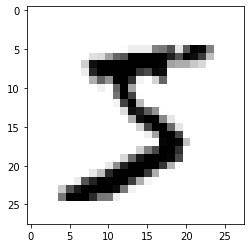

In [3]:
#Disaply one data
plt.imshow(x_train[0,:,:], cmap=plt.cm.binary)  
plt.show()  

Note that to make this comparable to the call being replaced, you might have to add a X = X.reshape((-1, 28 * 28)) on the images, and a y_one_hot = np.zeros((y.shape[0], 10)); y_one_hot[np.arange(y.shape[0]), y] = 1 to get one-hot labels out. 

In [0]:
# Preprocess the data  - Change shape & Normalize pixel values to be between 0 and 1
x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.   #image size(28x28), 1 channel : gray
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255.

In [5]:
# one-hot encoding using keras' numpy-related utilities
from keras.utils import np_utils

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


Using TensorFlow backend.


##Build Model

In [0]:
# First Convolution Layer
num_filter1 = 32
filter1shape = [4,4,1,num_filter1]

x = tf.placeholder(tf.float32, [None, 28,28,1])

w1 = tf.Variable(tf.truncated_normal(filter1shape, stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[num_filter1]))
hy1 = tf.nn.conv2d(x, w1 , strides=[1,1,1,1] , padding='SAME')

af1 = tf.nn.relu(hy1 + b1)
pool1 = tf.nn.max_pool(af1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [0]:
# Second Convolution Layer
num_filter2 = 64
filter2shape = [4,4,num_filter1,num_filter2]

w2 = tf.Variable(tf.truncated_normal(filter2shape,stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[num_filter2]))
hy2 = tf.nn.conv2d(pool1, w2, strides=[1,1,1,1], padding='SAME' )

af2 = tf.nn.relu(hy2+b2)
pool2 = tf.nn.max_pool(af2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')


In [0]:
#Fully Connected Layer
pool2_flat = tf.reshape(pool2, [-1,7*7*num_filter2])

num_units1 = 7*7*num_filter2
num_units2 = 1024

#First layer of FNN 
w3 = tf.Variable(tf.truncated_normal([num_units1, num_units2]))
b3 = tf.Variable(tf.constant(0.1, shape=[num_units2]))
hy3 = tf.nn.relu(tf.matmul(pool2_flat, w3) + b3)

hy3_drop = tf.keras.layers.Dropout(rate=0.2)(hy3)

#Second layer of FNN - 10 for One Hot incording
w0 = tf.Variable(tf.random_normal([num_units2, 10]))
b0 = tf.Variable(tf.random_normal([10]))
k = tf.matmul(hy3_drop, w0) + b0
hy = tf.nn.softmax(k)


In [0]:
#define loss (cost) function
y = tf.placeholder(tf.float32, [None, 10])
learning_rate = 0.01

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=k, labels=y)) 
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [0]:
prediction = tf.argmax(hy, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
# Prepare session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [12]:
for step in range(5):
  sess.run(opt, feed_dict={x: x_train, y: y_train})
  #if step % 1 == 0:
  loss, acc = sess.run([cost, accuracy], feed_dict={x: x_train, y: y_train})
  print("Step: {:5}\t Loss: {:.3f}\tAcc: {:.2%}".format( step, loss, acc))

Step:     0	 Loss: 1627.255	Acc: 10.58%
Step:     1	 Loss: 1759.215	Acc: 14.49%
Step:     2	 Loss: 1571.634	Acc: 13.12%
Step:     3	 Loss: 1226.097	Acc: 10.44%
Step:     4	 Loss: 679.704	Acc: 9.93%
